Your task is to:
    
1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
2. Implement Naive Bayes on your own from scratch for text classification. 
3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [68]:
# importing all libraraies
import numpy as np
import pandas as pd
import os
import sys
import re
import string
from sklearn.model_selection import train_test_split

#### For stop_words we need intall nltk which is provided stop_words

In [69]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [70]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
# using os.listdir(), take offline 20_groupsnews categories
all_categories = os.listdir("C:/Users/91902/Desktop/Text Data/20_newsgroups")
all_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [72]:
# it will take some time to execute
X = []
Y = []
# now iterating each category to each category's documents
for category in all_categories:
    category_documents = os.listdir("C:/Users/91902/Desktop/Text Data/20_newsgroups/"+category)
    for doc in category_documents:
        # now take text from each categories's documents
        with open("C:/Users/91902/Desktop/Text Data/20_newsgroups/"+category+"/"+doc) as file:
            # append first  document_name and second value documents_text as tuple in X list
            X.append((doc, file.read()))
            # append category name in Y
            Y.append(category)

In [73]:
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][0]))

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>


In [74]:
print(X[0])   # X[(document_name, document_text)]

('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resourc

In [75]:
# splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [76]:
print(len(x_train))
print(len(x_test))

14997
5000


In [77]:
x_test[0]

('15349',
 'Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!uunet!well!well.sf.ca.us!artmel\nFrom: artmel@well.sf.ca.us (Arthur Melnick)\nSubject: Big Brother (Clipper) chip\nMessage-ID: <artmel.735174442@well.sf.ca.us>\nSummary: Some thoughts on the use of the Big Brother (Clipper) chip\nKeywords: clipper\nSender: news@well.sf.ca.us\nNntp-Posting-Host: well.sf.ca.us\nOrganization: The Whole Earth \'Lectronic Link, Sausalito, CA\nDate: Sun, 18 Apr 1993 23:07:22 GMT\nLines: 57\n\n\n     There are some issues which come to mind when one considers\nthe law enforcement aspects of the use of the Big Brother\n(Clipper) chip.\n     The drug dealers and terrorists aren\'t going to let\nthemselves be caught by using this type of encryption.  In 1985\nthe New York Times reported that government investigators broke\nup a narcotics ring that was operating highly sophisticated\nequipment capable of allowing the leaders of the ring to\neavesdrop on the law-en

In [78]:
# making dict of words as keys and its freq as values
# dictionary format -> dict{'word':freq(int)}
dict = {}
for i in range(len(x_train)):
    # here I am taking [1] b'coz [0] is dict name, [1] dict text
    words_list = x_train[i][1].lower()  # use lower() for covert capital latter into small
    words = re.split('\W+', words_list)  # it will return a list remove special characters
    # now iterating each word
    for word in words:
        # avoid stopewords and avoid those word which has lenght <= 2 and alpha word
        if not(word.isalpha()) or word in stopwords or len(word) <= 2:
            continue
        
        # add word in dict as keys and freq as values
        if word in dict:
            dict[word] += 1
        else:
            dict[word] = 1
            
dict 

{'path': 15284,
 'cantaloupe': 19480,
 'srv': 24247,
 'cmu': 39220,
 'edu': 122631,
 'rochester': 3626,
 'udel': 3239,
 'gatech': 3293,
 'howland': 8256,
 'reston': 8214,
 'ans': 8308,
 'net': 19141,
 'zaphod': 6174,
 'mps': 6854,
 'ohio': 11762,
 'state': 14047,
 'news': 25683,
 'acns': 423,
 'nwu': 235,
 'uicvm': 234,
 'uic': 251,
 'organization': 14870,
 'university': 7451,
 'illinois': 491,
 'chicago': 502,
 'academic': 212,
 'computer': 2769,
 'center': 1376,
 'date': 15607,
 'wed': 1220,
 'apr': 15361,
 'cdt': 442,
 'pankaj': 2,
 'saxena': 2,
 'message': 16454,
 'newsgroups': 15315,
 'comp': 9845,
 'windows': 5729,
 'misc': 8818,
 'subject': 16227,
 'tcp': 194,
 'lines': 15677,
 'know': 6787,
 'much': 3778,
 'computers': 770,
 'please': 2878,
 'bear': 545,
 'question': 2415,
 'context': 437,
 'use': 5263,
 'package': 707,
 'called': 1511,
 'slip': 158,
 'home': 1154,
 'connect': 227,
 'mainframe': 29,
 'ibm': 3142,
 'running': 1056,
 'vms': 582,
 'mvs': 56,
 'log': 124,
 'account

In [79]:
len(dict)

94297

In [80]:
# now we need to sort the dict on the basis of word_freq in decreacing order
import operator
sorted_dict = sorted(dict.items(), key = operator.itemgetter(1), reverse = True)
sorted_dict

[('edu', 122631),
 ('cmu', 39220),
 ('com', 37602),
 ('news', 25683),
 ('srv', 24247),
 ('cantaloupe', 19480),
 ('net', 19141),
 ('message', 16454),
 ('subject', 16227),
 ('lines', 15677),
 ('date', 15607),
 ('apr', 15361),
 ('newsgroups', 15315),
 ('path', 15284),
 ('organization', 14870),
 ('state', 14047),
 ('gmt', 13336),
 ('would', 11924),
 ('ohio', 11762),
 ('one', 11762),
 ('writes', 11048),
 ('article', 10049),
 ('comp', 9845),
 ('references', 9734),
 ('talk', 9129),
 ('misc', 8818),
 ('ans', 8308),
 ('howland', 8256),
 ('sender', 8228),
 ('reston', 8214),
 ('like', 7844),
 ('people', 7746),
 ('university', 7451),
 ('posting', 7400),
 ('nntp', 7041),
 ('mps', 6854),
 ('know', 6787),
 ('host', 6715),
 ('sci', 6565),
 ('get', 6491),
 ('think', 6224),
 ('zaphod', 6174),
 ('usenet', 6170),
 ('may', 6124),
 ('alt', 5773),
 ('politics', 5761),
 ('windows', 5729),
 ('also', 5675),
 ('rutgers', 5305),
 ('time', 5270),
 ('use', 5263),
 ('harvard', 5177),
 ('near', 5163),
 ('eng', 5134),

#### Plotting a Graph on Number of words vs Frq
#### with the help of graph we can easily decide the number of features which is important

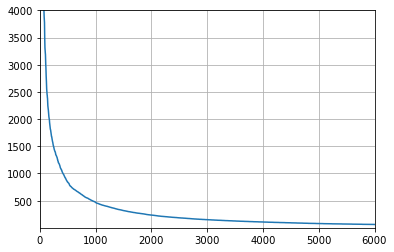

In [81]:
import matplotlib.pyplot as plt
features_dict = sorted_dict
num_of_word = []
word_freq = []
for i in range(len(features_dict)):
    num_of_word.append(i)
    word_freq.append(features_dict[i][1])
    
plt.plot(num_of_word, word_freq)
plt.axis([0, 6000, 1, 4000])
plt.grid()
plt.show()

In [82]:
# with the help of graph we can easily decided to take top 2500 word with max freq
words_with_max_freq = [features_dict[i][0] for i in range(2500)]
words_with_max_freq

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'would',
 'ohio',
 'one',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'like',
 'people',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'rutgers',
 'time',
 'use',
 'harvard',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'system',
 'crabapple',
 'well',
 'noc',
 'soc',
 'sei',
 'could',
 'das',
 'xref',
 'even',
 'cis',
 'europa',
 'see',
 'gtefsd',
 'org',
 'ece',
 'world',
 'religion',
 'way',
 'uunet',
 'make',
 'god',
 'max',
 'say',
 'christian',
 'gov',
 'first',
 'many',
 'two',
 'much',
 'right',
 'rochester',
 'distribution',
 'space',
 'club',
 'mail',
 'andrew',
 'sun',
 'gatech',
 'anyone',
 'want',
 'used',
 'udel',
 'reply',
 '

In [83]:
def convert_2d_matrix_data(x_data):
    no_of_rows = len(x_data)
    no_of_column = len(words_with_max_freq)
    # making x_train dataset
    X_data = np.zeros([no_of_rows, no_of_column], int)

    for i in range(len(x_data)):
        words = x_data[i][1].lower()
        word = re.split('\W+', words)
        # iterating each word
        for w in word:
            if w in words_with_max_freq:
                X_data[i][words_with_max_freq.index(w)] += 1
    return X_data

In [84]:
# it will take time to execute
# x_train format -> x_train[(document_name, document_text)], we need to convert it 2d_matrix(mXn)
x_train_data = convert_2d_matrix_data(x_train)
x_train_data

array([[ 7,  1,  1, ...,  0,  0,  0],
       [ 4,  2,  0, ...,  0,  0,  0],
       [12,  4,  2, ...,  0,  0,  0],
       ...,
       [ 7,  3,  4, ...,  0,  0,  0],
       [10,  1,  0, ...,  0,  0,  0],
       [11,  3,  1, ...,  0,  0,  0]])

In [85]:
x_train_data.shape

(14997, 2500)

In [86]:
# it will take time to execute
x_test_data = convert_2d_matrix_data(x_test)
x_test_data

array([[ 2,  1,  0, ...,  0,  0,  0],
       [10,  2,  0, ...,  0,  0,  0],
       [ 9,  5,  1, ...,  0,  0,  0],
       ...,
       [ 2,  2,  0, ...,  0,  0,  0],
       [ 6,  1,  0, ...,  0,  0,  0],
       [ 3,  3,  1, ...,  0,  0,  0]])

In [88]:
x_test_data.shape

(5000, 2500)

## 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).

In [89]:
# use sklearn naive bayes MultiNomial
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
# trained Model
clf = MultinomialNB()
clf.fit(x_train_data, y_train)

MultinomialNB()

In [91]:
# prediction
y_pred = clf.predict(x_test_data)

In [92]:
print("Classification report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print()
print("Accuracy Score")
print(accuracy_score(y_test, y_pred)*100, '%', sep="")

Classification report
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.80      0.80       246
           comp.graphics       0.82      0.78      0.80       290
 comp.os.ms-windows.misc       0.78      0.78      0.78       238
comp.sys.ibm.pc.hardware       0.75      0.82      0.78       262
   comp.sys.mac.hardware       0.75      0.89      0.81       235
          comp.windows.x       0.85      0.71      0.77       230
            misc.forsale       0.81      0.93      0.87       246
               rec.autos       0.85      0.92      0.88       241
         rec.motorcycles       0.89      0.98      0.94       240
      rec.sport.baseball       0.92      0.94      0.93       229
        rec.sport.hockey       0.95      0.93      0.94       260
               sci.crypt       1.00      0.94      0.97       256
         sci.electronics       0.86      0.82      0.84       280
                 sci.med       0.97      0.86      0.

## 2. Implement Naive Bayes on your own from scratch for text classification.

In [93]:
def fit(x_train, y_train):
    count = {}
    y_train = np.array(y_train)
    # total number of documents in x_train
    count["Total_documents"] = len(y_train)
    # take unique values of y_train classes
    classes = set(y_train)
    for current_class in classes:
        #total_words = 0
        count_words_freq_with_curr_cls = 0
        # top level dict
        count[current_class] = {}
        # selecting x_train corresponding to the current_class
        x_train_with_curr_cls = x_train[y_train == current_class]
        
        # finding length of data with category corresponding to current class
        length_curr_cls = x_train_with_curr_cls.shape[0]
        
        for feature in words_with_max_freq:
            # calculating total word in feature
            sum_curr_word_freq = (x_train_with_curr_cls[:, words_with_max_freq.index(feature)]).sum()
            count[current_class][feature] = sum_curr_word_freq
            count_words_freq_with_curr_cls += sum_curr_word_freq
            
        # total word in that class
        count[current_class]["Total_words"] = count_words_freq_with_curr_cls
        # length of data with current class
        count[current_class]["data_points_curr_class"] = length_curr_cls
    return count

In [94]:
def probability(x, dictionary, current_class):
    output = np.log(dictionary[current_class]["data_points_curr_class"]) - np.log(dictionary["Total_documents"])
    features = list(dictionary[current_class].keys())
    
    for j in range(len(features)-2):
        # feature
        xj = x[j]
        if xj == 0:
            current_prob = 0
        else:
            # add Laplace correction
            num = dictionary[current_class][features[j]] + 1
            den = dictionary[current_class]["Total_words"] + len(dictionary[current_class].keys())-2   
            current_prob = np.log(num) - np.log(den)
        output += current_prob
    return output

In [95]:
def predict_single_point(x, dictionary):
    first_run = True
    #best_class = - 1
    #best_prob = -1000
    
    classes = dictionary.keys()
    for current_class in classes:
        if current_class == "Total_documents" :
            continue
        prob = probability(x, dictionary, current_class)
        if first_run or prob > best_prob:
            best_prob = prob
            best_class = current_class
        first_run = False
    return best_class

In [96]:
def predict(x_test, dictionary):
    y_pred = []
    for x in x_test:
        x_class = predict_single_point(x, dictionary)
        y_pred.append(x_class)
    return y_pred

In [97]:
# it will take some time
dictionary = fit(x_train_data, y_train)

In [98]:
dictionary

{'Total_documents': 14997,
 'alt.atheism': {'edu': 7084,
  'cmu': 2086,
  'com': 2458,
  'news': 1454,
  'srv': 1217,
  'cantaloupe': 951,
  'net': 1040,
  'message': 782,
  'subject': 823,
  'lines': 789,
  'date': 795,
  'apr': 807,
  'newsgroups': 762,
  'path': 760,
  'organization': 725,
  'state': 659,
  'gmt': 671,
  'would': 814,
  'ohio': 559,
  'one': 969,
  'writes': 942,
  'article': 748,
  'comp': 1,
  'references': 720,
  'talk': 709,
  'misc': 346,
  'ans': 453,
  'howland': 452,
  'sender': 343,
  'reston': 452,
  'like': 443,
  'people': 729,
  'university': 320,
  'posting': 450,
  'nntp': 428,
  'mps': 374,
  'know': 455,
  'host': 360,
  'sci': 20,
  'get': 231,
  'think': 582,
  'zaphod': 341,
  'usenet': 238,
  'may': 285,
  'alt': 1154,
  'politics': 8,
  'windows': 0,
  'also': 248,
  'rutgers': 1,
  'time': 353,
  'use': 159,
  'harvard': 343,
  'near': 339,
  'eng': 304,
  'new': 148,
  'rec': 21,
  'good': 311,
  'system': 308,
  'crabapple': 266,
  'well': 3

In [99]:
y_pred2 = predict(x_test_data, dictionary)
y_pred2

['sci.crypt',
 'talk.politics.mideast',
 'alt.atheism',
 'talk.politics.guns',
 'comp.sys.ibm.pc.hardware',
 'comp.graphics',
 'sci.electronics',
 'comp.sys.ibm.pc.hardware',
 'rec.motorcycles',
 'rec.autos',
 'rec.sport.baseball',
 'comp.graphics',
 'soc.religion.christian',
 'comp.windows.x',
 'soc.religion.christian',
 'misc.forsale',
 'comp.graphics',
 'sci.crypt',
 'rec.autos',
 'misc.forsale',
 'comp.windows.x',
 'talk.religion.misc',
 'talk.politics.mideast',
 'talk.politics.guns',
 'talk.religion.misc',
 'rec.sport.baseball',
 'talk.politics.mideast',
 'sci.space',
 'sci.med',
 'rec.motorcycles',
 'sci.space',
 'misc.forsale',
 'comp.sys.ibm.pc.hardware',
 'comp.windows.x',
 'talk.religion.misc',
 'talk.religion.misc',
 'talk.politics.mideast',
 'talk.politics.guns',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'sci.crypt',
 'comp.windows.x',
 'comp.graphics',
 'misc.forsale',
 'comp.graphics',
 'misc.forsale',
 'sci.crypt',
 'comp.graphics',
 'comp.sys.ibm.pc.hardwa

In [100]:
len(y_pred2)

5000

In [101]:
print("Classification report")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))
print()
print("Accuracy Score")
print(accuracy_score(y_test, y_pred2)*100, '%', sep="")

Classification report
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.83      0.81       246
           comp.graphics       0.79      0.84      0.81       290
 comp.os.ms-windows.misc       0.84      0.75      0.79       238
comp.sys.ibm.pc.hardware       0.78      0.84      0.81       262
   comp.sys.mac.hardware       0.80      0.89      0.85       235
          comp.windows.x       0.88      0.76      0.81       230
            misc.forsale       0.83      0.94      0.88       246
               rec.autos       0.92      0.94      0.93       241
         rec.motorcycles       0.96      0.99      0.98       240
      rec.sport.baseball       0.95      0.95      0.95       229
        rec.sport.hockey       0.96      0.95      0.96       260
               sci.crypt       0.99      0.95      0.97       256
         sci.electronics       0.87      0.91      0.89       280
                 sci.med       0.96      0.90      0.

### 3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

using Multinomial Naive Bayes(already implemented in sklearn)

In [102]:
print("Accuracy Score")
print(accuracy_score(y_test, y_pred)*100, '%', sep="")

Accuracy Score
85.34%


using self Implement Naive Bayes text classification.

In [103]:
print("Accuracy Score")
print(accuracy_score(y_test, y_pred2)*100, '%', sep="")

Accuracy Score
86.96000000000001%


sklearn Multinomial naive bayes classification accuracy is 85.34% and self implement text classification gave 86.96%. 